## Example 3: Effect of varying Ito conductance

In this example, we use the same technique as in example 2 to show the effects of varying a conductance variable.

As before, the code has some knowledge of the model: It assumes that there is a variable called `ito.gTo` that represents the maximal conductance of the Ito current.

There is one complication: The value of `ito.gto` is not a constant: it depends on the value of `cell.type`.
This means we can't change it directly in the simulation like we did with `cell.type` itself in example 2.
To get around this, we first modify the model, changing `ito.gto` to a constant.

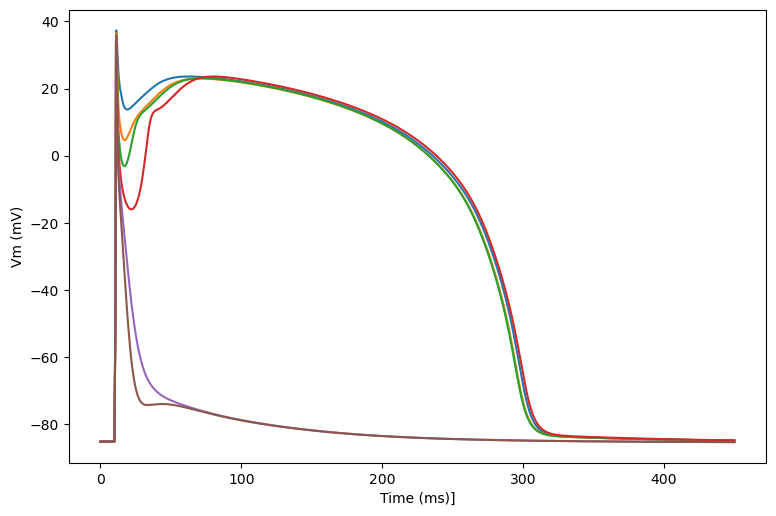

In [1]:
import myokit

# Load the model and protocol, discard the script
m, p, _ = myokit.load('models/c/tentusscher-2006.mmt')

# Update the model, turning ito.gto into a "literal", i.e. a variable
# that is defined as a single number.
m.get('ito.gto').set_rhs(1)

# Create a simulation with the updated model
s = myokit.Simulation(m, p)

# Choose the values to explore
g_values = [0.3, 0.6, 0.9, 1.2, 1.5, 1.8]

# Run the simulation for different levels of gTo
logs = []
for g_to in g_values:

    # Update the simulation with the new value of gTo
    s.set_constant('ito.gto', g_to)

    # Reset the simulation back to time zero and the original state
    s.reset()

    # Run the simulation and append the log to the list
    d = s.run(450)
    logs.append(d)

# Display the results
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 6), dpi=100)
ax = fig.add_subplot()
ax.set_xlabel('Time (ms)]')
ax.set_ylabel('Vm (mV)')

for d in logs:
    ax.plot(d['engine.time'], d['membrane.V'])
plt.show()